In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import random as rd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
import sys
import PeakDetective
import PeakDetective.detection_helper as detection_helper
import scipy.stats as stats
import seaborn as sb
import sklearn.metrics as met
import random as rd
import importlib
import pickle as pkl
from matplotlib.colors import LinearSegmentedColormap



In [2]:
datadir = "D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/"
resolution = 60
window = 1.0

In [3]:
#covid_plasma
ms1ppm = 50
peakWidth = (10,93)
s2n = 9.1
noise = 100
mzDiff = 0.0045
prefilter = 3

In [4]:
det = detection_helper.PeakList()
#det.runXCMS(datadir, "xcms_peak_list.csv", "negative", ms1ppm, peakWidth,s2n=s2n,noise=noise,mzDiff=mzDiff,prefilter=prefilter)
det.readXCMSPeakList(datadir+"xcms_peak_list.csv")
#det.to_skyline(datadir+"xcms_peak_list_transition_list.csv","Negative",moleculeListName = "XCMS peaks")
peakList = pd.DataFrame(det.peakList)
#peakList = peakList[["mz","rt"]]
peakList

,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0001,52.979938,5.065533,4.959100,5.148091,0.000000,0.000000,0.00000,150837.234745,194413.486705,182357.676981,...,2419.482741,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386
FT0002,52.979845,4.829960,4.693100,4.865565,0.000000,930.129534,0.00000,55655.981332,63525.648336,49132.620413,...,109236.614651,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847
FT0003,52.979639,1.756369,1.674209,1.810926,10837.656774,9208.201589,12363.55156,11387.833288,8725.272745,9047.622786,...,8375.259893,8291.012390,10633.587115,7078.631853,7309.740413,6751.376184,9682.674564,11268.998269,9743.546611,5944.375184
FT0004,54.976962,5.079406,5.032442,5.131516,0.000000,0.000000,0.00000,74036.348212,41823.759345,51858.992980,...,49015.141344,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720
FT0005,54.977004,4.967265,4.884650,4.992359,339.382945,317.488548,0.00000,69324.270557,30759.487873,68950.167360,...,89538.583851,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,1696.074555,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,1316.403455,0.000000,0.000000,...,4058.218594,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754
FT8294,1697.082626,0.760141,0.753100,0.767181,0.000000,0.000000,0.00000,2366.984688,0.000000,0.000000,...,4407.592237,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480
FT8295,1698.089255,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,3290.152508,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852
FT8296,1699.086468,0.767181,0.767181,0.767181,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,2929.793620,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000


In [5]:
files = [x for x in os.listdir(datadir) if ".mzML" in x]
print(files)
raw_data = []
for file in files:
    temp = PeakDetective.rawData()
    temp.readRawDataFile(datadir + file,ms1ppm)
    raw_data.append(temp)
    

['blank-1_6540.mzML', 'blank-2_6540.mzML', 'blank-3_6540.mzML', 'P H-464_6540.mzML', 'P H-469 -2 _6540.mzML', 'P H-471_6540.mzML', 'P H-472_6540.mzML', 'P H-476_6540.mzML', 'P H-480_6540.mzML', 'P H-482_6540.mzML', 'P H-487_6540.mzML', 'P H-488_6540.mzML', 'P H-507_6540.mzML', 'P H-514_6540.mzML', 'QC-P pool-2_6540.mzML', 'QC-P pool-3_6540.mzML', 'QC-P pool-4_6540.mzML']


In [6]:
integ = PeakDetective.PeakDetective(numCores = 20,resolution=resolution)

In [7]:
if __name__ == "__main__":
    rts = peakList["rt"].values
    X = integ.makeDataMatrix(raw_data,peakList["mz"],rts,align=True)

forming matrix |██████████████████████████████████████████████████| 100.0% 
aligning EICs |██████████████████████████████████████████████████| 100.0% 


In [8]:
X_signal = integ.generateSignalPeaks(peakList,raw_data,n=50)
X_noise = integ.generateFalsePeaks(peakList,raw_data,n=50)
X_syn = np.concatenate((X_signal,X_noise),axis=0)
y_syn = np.array([[0.0,1.0] for _ in X_signal] + [[1.0,0.0] for _ in X_noise])

forming matrix |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 


In [9]:
pkl.dump([X,X_syn,y_syn],open(datadir + "model_selection_data.pkl","wb"))

In [7]:
[X,X_syn,y_syn] = pkl.load(open(datadir + "model_selection_data.pkl","rb"))

In [11]:
if __name__ == "__main__":
    integ.trainSmoother(peakList,raw_data,100000,10,64,0.1)

generating EICs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
done
fitting smoother...
Epoch 1/10
1407/1407 [==============================] - 24s 16ms/step - loss: 0.1619 - mean_absolute_error: 0.0791 - val_loss: 0.0805 - val_mean_absolute_error: 0.0100
Epoch 2/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0785 - mean_absolute_error: 0.0076 - val_loss: 0.0761 - val_mean_absolute_error: 0.0072
Epoch 3/10
1407/1407 [==============================] - 23s 16ms/step - loss: 0.0764 - mean_absolute_error: 0.0061 - val_loss: 0.0747 - val_mean_absolute_error: 0.0063
Epoch 4/10
1407/1407 [==============================] - 22s 15ms/step - loss: 0.0755 - mean_absolute_error: 0.0054 - val_loss: 0.0740 - val_mean_absolute_error: 0.0056
Epoch 5/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0750 - mean_absolute_error: 0.0050 - val_loss: 0.0735 - val_mean_absolute_error: 0.0053
Epoch 6/10
1407/1407 [==================

In [12]:
integ.save(datadir + "smoothed_only/")

In [13]:
integ.load(datadir + "smoothed_only/")

1/1 [==============================] - 0s 26ms/step
loss: 0.5714802145957947 mean_absolute_error: 0.32523006200790405 val loss: 0.40962791442871094 val_mean_absolute_error: 0.21180132031440735 numEpochs: 200
4407/4407 [==============================] - 6s 1ms/step


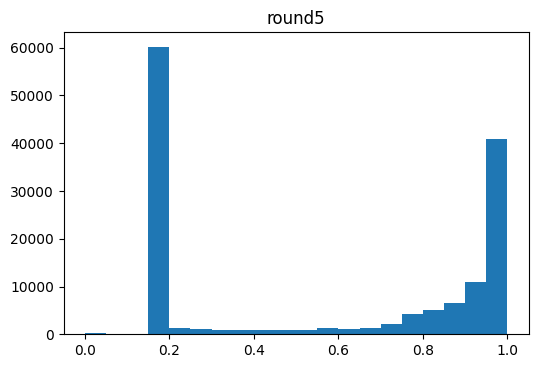

141014 unclassified features remaining
Continue with another iteration? (1=Yes, 0=No): 


 0


In [14]:
if __name__ == "__main__":
    integ.trainClassifierActive(X,X_syn,y_syn,200,1000,32,5,numVal = 10,numManualPerRound=5,inJupyter=True)

In [15]:
integ.save(datadir + "active/")

In [8]:
integ.load(datadir + "active/")

In [9]:
if __name__ == "__main__":
    peak_curated,peak_scores,peak_intensities = integ.curatePeaks(raw_data,peakList,threshold=0.5,align=False)
    peak_curated

generating EICs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
4408/4408 [==============================] - 5s 1ms/step


In [10]:
y = integ.classifyMatrix(X)

4408/4408 [==============================] - 5s 1ms/step


In [11]:
def tmp(val):
    if val > 0.5:
        return "blue"
    return "grey"
row_colors = [tmp(x) for x in y[:len(peakList),1]]
#sb.clustermap(PeakDetective.normalizeMatrix(X[:len(peakList)]),col_cluster=False,yticklabels=False,cmap="magma",vmin=0.0,vmax=1.0,row_colors=row_colors)

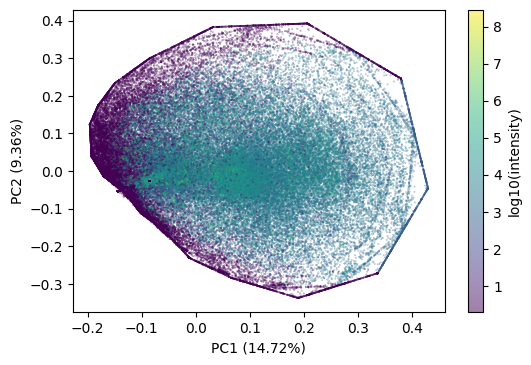

In [12]:
pca = PCA(2)
loads = pca.fit_transform(PeakDetective.normalizeMatrix(X))
plt.scatter(loads[:,0],loads[:,1],c=np.log10(np.array([np.max([2, PeakDetective.integratePeak(x)]) for x in X])),s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
#plt.xlim((-.5,.5))
plt.colorbar(label="log10(intensity)")

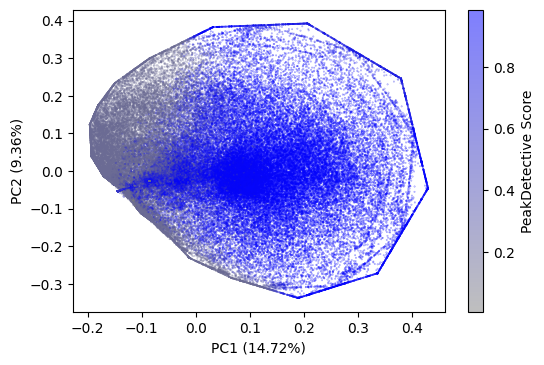

In [13]:
pca = PCA(2)
loads = pca.fit_transform(PeakDetective.normalizeMatrix(X))
colormap = LinearSegmentedColormap.from_list("test",colors=["grey", "blue"],N=256)
plt.scatter(loads[:,0],loads[:,1],c=y[:,1],s=.1,alpha=.5,cmap=colormap)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
#plt.xlim((-.5,.5))

plt.colorbar(label="PeakDetective Score")

Text(0, 0.5, '% of features')

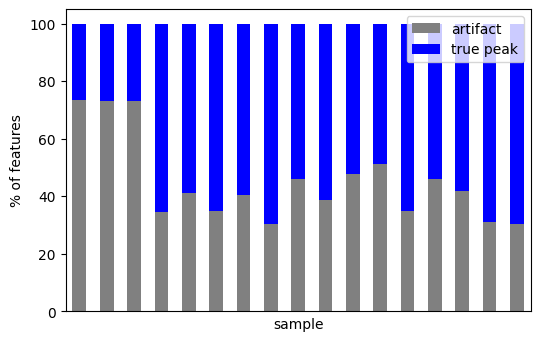

In [14]:
df = {}
for file in files:
    for index,row in peak_curated.iterrows():
        if row[datadir + file] > 0.5:
            df[len(df)] = {"sample":file,"classification":"true peak"}
        else:
            df[len(df)] = {"sample":file,"classification":"artifact"}

df = pd.DataFrame.from_dict(df,orient="index")

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf


aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["grey","blue"])
plt.xticks([],[])
plt.ylabel("% of features")

In [15]:
xcmsCols = [x for x in peakList.columns.values if ".mzML" in x and "D:" not in x]
xcms_peak_areas = peakList[xcmsCols]
xcms_peak_areas

,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,P H-472_6540.mzML,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0001,0.000000,0.000000,0.00000,150837.234745,194413.486705,182357.676981,2486.967242,2419.482741,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386
FT0002,0.000000,930.129534,0.00000,55655.981332,63525.648336,49132.620413,85895.599533,109236.614651,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847
FT0003,10837.656774,9208.201589,12363.55156,11387.833288,8725.272745,9047.622786,5899.952212,8375.259893,8291.012390,10633.587115,7078.631853,7309.740413,6751.376184,9682.674564,11268.998269,9743.546611,5944.375184
FT0004,0.000000,0.000000,0.00000,74036.348212,41823.759345,51858.992980,36614.956408,49015.141344,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720
FT0005,339.382945,317.488548,0.00000,69324.270557,30759.487873,68950.167360,78110.782799,89538.583851,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,0.000000,0.000000,0.00000,1316.403455,0.000000,0.000000,1717.980596,4058.218594,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754
FT8294,0.000000,0.000000,0.00000,2366.984688,0.000000,0.000000,1998.236755,4407.592237,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480
FT8295,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1508.581696,3290.152508,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852
FT8296,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2929.793620,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000


In [16]:
pdCols = [x for x in peak_intensities.columns.values if ".mzML" in x and "D:" in x]
pd_peak_areas = peak_intensities[pdCols]
pd_peak_areas

,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML
FT0001,0.000000,0.000000,0.000000,154667.994778,119338.705050,140083.410674,118634.643975,198158.128097,116400.964624,105369.760301,109949.954436,109520.005733,121595.656139,97530.267916,108317.271217,158520.408061,182295.917200
FT0002,340.315865,0.000000,0.000000,154749.804036,119281.289979,140276.763007,167661.491675,191711.672077,164240.393899,154549.771070,158180.172098,173199.368978,142361.241135,128558.093142,162902.964202,158606.200956,182457.066997
FT0003,9251.653169,7371.635163,7070.666637,9546.578941,2337.859990,8383.835351,3715.909663,5887.031228,3916.360850,7176.880225,7162.326792,3662.705806,5053.910566,3898.782123,8447.830737,3500.281852,6042.137215
FT0004,0.000000,277.217442,0.000000,27419.692923,21599.497640,29610.631564,24982.392325,42644.137544,20935.958690,18520.960419,16537.590693,15704.619138,19497.061915,11272.096453,20742.118950,29462.584060,50638.021149
FT0005,0.000000,218.187776,0.000000,63223.459739,36083.857107,49130.893858,52593.806803,45331.676618,24571.356553,27947.534026,48119.153857,28966.683541,50738.097298,31857.164062,33553.292646,56450.915339,52352.046557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,0.000000,0.000000,0.000000,953.341908,593.670696,0.000000,1941.337465,4161.968546,3157.362806,0.000000,0.000000,0.000000,0.000000,0.000000,1157.852792,0.000000,0.000000
FT8294,0.000000,0.000000,0.000000,1977.202267,0.000000,0.000000,1888.643333,4153.201847,3372.752720,0.000000,0.000000,0.000000,578.689190,0.000000,1519.687063,779.747505,547.060625
FT8295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1024.342243,3314.951041,4132.700521,0.000000,0.000000,0.000000,0.000000,0.000000,337.725852,632.801443,504.285702
FT8296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,642.064054,3165.731241,2228.831703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


(0.7646490126528812, 0.0)

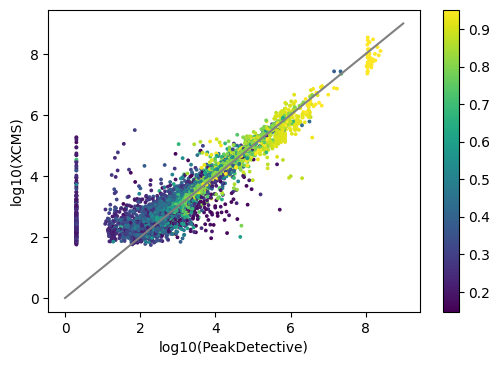

In [17]:
plt.scatter(np.log10(pd_peak_areas.values.mean(axis=1)+2),np.log10(xcms_peak_areas.values.mean(axis=1)+2),s=3,c=peak_scores[pdCols].values.mean(axis=1))
plt.plot([0,9],[0,9],color="grey")
plt.xlabel("log10(PeakDetective)")
plt.ylabel("log10(XCMS)")
plt.colorbar()
stats.pearsonr(pd_peak_areas.values.mean(axis=1),xcms_peak_areas.values.mean(axis=1))

In [18]:
if __name__ == "__main__":
    peak_scores_pd_det, peak_intensities_pd_det,transitionLists,X = integ.detectPeaks(raw_data, cutoff=0.5, intensityCutoff = 1000,numDataPoints=3,window=0.05,align=False)

Detecting ROIs |█████████████████████████████████████████████████-| 100.0% 4312 ROIs found
4195  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
31307285 EICs constructed for evaluation
32507/32507 [==============================] - 39s 1ms/step
done
114323  peaks found


In [19]:
X.shape

(1943491, 60)

In [20]:
peak_scores_pd_det

,index,mz,rt,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML
0,16,52.979847,0.856483,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.883634,0.0,0.000000,0.000000,0.000000
1,17,52.979847,0.906483,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.950411,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,19,52.979847,1.006483,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.828497,0.000000
3,20,52.979847,1.056483,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.907696,0.00000,0.0,0.000000,0.0,0.000000,0.805546,0.000000
4,31,52.979847,1.606483,0.0,0.505189,0.0,0.000000,0.362478,0.0,0.330997,0.000000,0.730935,0.162473,0.64283,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114318,1840741,1696.067791,0.756483,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.950411,0.950411,0.950411,0.000000,0.00000,0.0,0.000000,0.0,0.950411,0.000000,0.000000
114319,1840742,1696.067791,0.806483,0.0,0.000000,0.0,0.801792,0.000000,0.0,0.000000,0.950411,0.950411,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.950411
114320,1841180,1697.071964,0.756483,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.950411,0.950411,0.950411,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.950411
114321,1841181,1697.071964,0.806483,0.0,0.000000,0.0,0.948145,0.000000,0.0,0.000000,0.950411,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.950411,0.000000,0.950411


In [23]:
peak_intensities_pd_det

,mz,rt,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML
0,52.979847,0.856483,0.000000,0.000000,0.000000,753.187716,0.000000,0.000000,0.000000,0.000000,0.000000,1.581681,0.000000,0.000000,1133.643473,3.090176,0.000000,0.000000,0.000000
1,52.979847,0.906483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.877966,0.000000,0.000000,0.000000,577.906926,0.000000,0.000000,0.000000,0.000000
2,52.979847,1.006483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.346946,0.000000,0.000000,0.000000,6.378885,1264.282244,0.000000
3,52.979847,1.056483,0.000000,0.000000,0.000000,0.000000,0.000000,481.526605,0.000000,0.000000,209.857318,1134.663482,0.000000,0.000000,496.620469,0.000000,0.000000,1308.665287,207.980218
4,52.979847,1.606483,1963.904337,8118.812986,2779.491382,3654.708008,3842.704172,2385.198993,3685.320197,3782.361815,5829.609240,3183.442255,1000.694167,3338.240773,2195.754500,4086.234699,2810.472162,2900.238542,3140.600784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114318,1696.067791,0.756483,0.000000,0.000000,0.000000,331.790573,511.622134,0.000000,2237.464632,4614.014432,3386.482627,0.000000,0.000000,0.000000,0.000000,0.000000,1513.170208,0.000000,0.000000
114319,1696.067791,0.806483,0.000000,0.000000,0.000000,1223.244977,794.867407,0.000000,2455.170892,4614.014432,3386.482627,0.000000,0.000000,0.000000,0.000000,0.000000,1527.807341,311.973333,1093.198067
114320,1697.071964,0.756483,0.000000,0.000000,0.000000,1401.322758,0.000000,0.000000,1592.404464,3869.811884,3621.557177,0.000000,0.000000,0.000000,627.506499,0.000000,1032.329162,844.299902,1194.643624
114321,1697.071964,0.806483,0.000000,0.000000,0.000000,2234.766608,0.000000,0.000000,2112.541897,3869.811884,3663.297477,0.000000,0.000000,0.000000,647.322556,0.000000,1738.180959,865.221900,1194.643624


In [24]:
peak_intensities_pd_det.to_csv(datadir + "peak_intensities_pd_det.csv")
peak_scores_pd_det.to_csv(datadir + "peak_scores_pd_det.csv")

In [5]:
peak_intensities_pd_det = pd.read_csv(datadir + "peak_intensities_pd_det.csv",index_col=0) 
peak_scores_pd_det = pd.read_csv(datadir + "peak_scores_pd_det.csv",index_col=0)

In [6]:
pdCols = [x for x in peak_intensities_pd_det.columns.values if ".mzML" in x and "D:" in x]
pdCols

['D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_ne

In [7]:
#plt.hist(np.log10(peak_intensities_pd_det[pdCols].values.flatten()+2),bins=100)
#plt.ylim((0,50000))

In [8]:
pd_peak_list = detection_helper.PeakList()
pd_peak_list.from_df(peak_intensities_pd_det,pdCols)
pd_peak_list.peakList

,mz,rt,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML
0,52.979847,0.856483,0.000000,0.000000,0.000000,753.187716,0.000000,0.000000,0.000000,0.000000,0.000000,1.581681,0.000000,0.000000,1133.643473,3.090176,0.000000,0.000000,0.000000
1,52.979847,0.906483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.877966,0.000000,0.000000,0.000000,577.906926,0.000000,0.000000,0.000000,0.000000
2,52.979847,1.006483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.346946,0.000000,0.000000,0.000000,6.378885,1264.282244,0.000000
3,52.979847,1.056483,0.000000,0.000000,0.000000,0.000000,0.000000,481.526605,0.000000,0.000000,209.857318,1134.663482,0.000000,0.000000,496.620469,0.000000,0.000000,1308.665287,207.980218
4,52.979847,1.606483,1963.904337,8118.812986,2779.491382,3654.708008,3842.704172,2385.198993,3685.320197,3782.361815,5829.609240,3183.442255,1000.694167,3338.240773,2195.754500,4086.234699,2810.472162,2900.238542,3140.600784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114318,1696.067791,0.756483,0.000000,0.000000,0.000000,331.790573,511.622134,0.000000,2237.464632,4614.014432,3386.482627,0.000000,0.000000,0.000000,0.000000,0.000000,1513.170208,0.000000,0.000000
114319,1696.067791,0.806483,0.000000,0.000000,0.000000,1223.244977,794.867407,0.000000,2455.170892,4614.014432,3386.482627,0.000000,0.000000,0.000000,0.000000,0.000000,1527.807341,311.973333,1093.198067
114320,1697.071964,0.756483,0.000000,0.000000,0.000000,1401.322758,0.000000,0.000000,1592.404464,3869.811884,3621.557177,0.000000,0.000000,0.000000,627.506499,0.000000,1032.329162,844.299902,1194.643624
114321,1697.071964,0.806483,0.000000,0.000000,0.000000,2234.766608,0.000000,0.000000,2112.541897,3869.811884,3663.297477,0.000000,0.000000,0.000000,647.322556,0.000000,1738.180959,865.221900,1194.643624


In [5]:
pd_peak_list.backgroundSubtract(["lank"],["QC"],3)
pd_peak_list.peakList

NameError: name 'pd_peak_list' is not defined

In [6]:
research_samps = [x for x in pd_peak_list.sampleCols if "QC" not in x and "lank" not in x]
research_samps

NameError: name 'pd_peak_list' is not defined

In [11]:
if __name__ == "__main__":
    pd_peak_list.removeRedundancy(0.95,0.15,"negative",20,5,sampleCols=research_samps)
    pd_peak_list.peakList

 |--------------------------------------------------| 0.0% 120 peak groups found

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


 |--------------------------------------------------| 0.0% 881 peak groups found

KeyboardInterrupt: 

In [34]:
pd_peak_list.peakList

,Unnamed: 0,mz,rt,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,...,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML,uniqueIon,Unnamed: 0.1
0,0,52.979847,0.856483,0.0,0.0,0.0,753.187716,0.000000,0.000000,0.000000,...,1.581681,0.000000,0.000000,1133.643473,3.090176,0.000000,0.000000,0.000000,True,0.0
1,1,52.979847,0.906483,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,577.906926,0.000000,0.000000,0.000000,0.000000,True,1.0
2,2,52.979847,1.006483,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,478.346946,0.000000,0.000000,0.000000,6.378885,1264.282244,0.000000,True,2.0
3,3,52.979847,1.056483,0.0,0.0,0.0,0.000000,0.000000,481.526605,0.000000,...,1134.663482,0.000000,0.000000,496.620469,0.000000,0.000000,1308.665287,207.980218,True,3.0
10,10,52.979847,3.556483,0.0,0.0,0.0,80.941886,0.000000,1087.884356,352.913859,...,339.734781,0.000000,192.943373,0.000000,141.652970,0.000000,704.649033,0.000000,True,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114318,114318,1696.067791,0.756483,0.0,0.0,0.0,331.790573,511.622134,0.000000,2237.464632,...,0.000000,0.000000,0.000000,0.000000,0.000000,1513.170208,0.000000,0.000000,True,114318.0
114319,114319,1696.067791,0.806483,0.0,0.0,0.0,1223.244977,794.867407,0.000000,2455.170892,...,0.000000,0.000000,0.000000,0.000000,0.000000,1527.807341,311.973333,1093.198067,True,114319.0
114320,114320,1697.071964,0.756483,0.0,0.0,0.0,1401.322758,0.000000,0.000000,1592.404464,...,0.000000,0.000000,0.000000,627.506499,0.000000,1032.329162,844.299902,1194.643624,True,114320.0
114321,114321,1697.071964,0.806483,0.0,0.0,0.0,2234.766608,0.000000,0.000000,2112.541897,...,0.000000,0.000000,0.000000,647.322556,0.000000,1738.180959,865.221900,1194.643624,True,114321.0


In [35]:
pd_feats = pd_peak_list.peakList[pd_peak_list.sampleCols]
pd_feats = pd_feats.rename(mapper={x:x.replace(datadir,"") for x in pd_feats.columns.values},axis=1)
pd_feats

,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,P H-472_6540.mzML,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
0,753.187716,0.000000,0.000000,0.000000,0.000000,0.000000,1.581681,0.000000,0.000000,1133.643473,3.090176,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,1921.877966,0.000000,0.000000,0.000000,577.906926,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.346946,0.000000,0.000000,0.000000,6.378885,1264.282244,0.000000
3,0.000000,0.000000,481.526605,0.000000,0.000000,209.857318,1134.663482,0.000000,0.000000,496.620469,0.000000,0.000000,1308.665287,207.980218
10,80.941886,0.000000,1087.884356,352.913859,385.866753,494.447277,339.734781,0.000000,192.943373,0.000000,141.652970,0.000000,704.649033,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114318,331.790573,511.622134,0.000000,2237.464632,4614.014432,3386.482627,0.000000,0.000000,0.000000,0.000000,0.000000,1513.170208,0.000000,0.000000
114319,1223.244977,794.867407,0.000000,2455.170892,4614.014432,3386.482627,0.000000,0.000000,0.000000,0.000000,0.000000,1527.807341,311.973333,1093.198067
114320,1401.322758,0.000000,0.000000,1592.404464,3869.811884,3621.557177,0.000000,0.000000,0.000000,627.506499,0.000000,1032.329162,844.299902,1194.643624
114321,2234.766608,0.000000,0.000000,2112.541897,3869.811884,3663.297477,0.000000,0.000000,0.000000,647.322556,0.000000,1738.180959,865.221900,1194.643624


In [5]:
det.backgroundSubtract(["lank"],["QC"],3)
det.peakList

2033 background features found


,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0001,52.979938,5.065533,4.959100,5.148091,0.000000,0.000000,0.0,150837.234745,194413.486705,182357.676981,...,2419.482741,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386
FT0002,52.979845,4.829960,4.693100,4.865565,0.000000,930.129534,0.0,55655.981332,63525.648336,49132.620413,...,109236.614651,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847
FT0004,54.976962,5.079406,5.032442,5.131516,0.000000,0.000000,0.0,74036.348212,41823.759345,51858.992980,...,49015.141344,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720
FT0005,54.977004,4.967265,4.884650,4.992359,339.382945,317.488548,0.0,69324.270557,30759.487873,68950.167360,...,89538.583851,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596
FT0006,54.976969,4.801401,4.779811,4.814990,343.583630,0.000000,0.0,25759.607674,22558.310998,25339.437306,...,43981.929575,39283.487645,26807.870496,17494.956321,28105.589902,20334.747217,18377.882106,34370.313171,28038.074352,23250.065608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,1696.074555,0.760348,0.750980,0.769717,0.000000,0.000000,0.0,1316.403455,0.000000,0.000000,...,4058.218594,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754
FT8294,1697.082626,0.760141,0.753100,0.767181,0.000000,0.000000,0.0,2366.984688,0.000000,0.000000,...,4407.592237,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480
FT8295,1698.089255,0.760348,0.750980,0.769717,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,3290.152508,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852
FT8296,1699.086468,0.767181,0.767181,0.767181,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,2929.793620,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000


In [6]:
research_samps = [x for x in det.sampleCols if "QC" not in x and "lank" not in x]
research_samps

['P H-464_6540.mzML',
 'P H-469 -2 _6540.mzML',
 'P H-471_6540.mzML',
 'P H-472_6540.mzML',
 'P H-476_6540.mzML',
 'P H-480_6540.mzML',
 'P H-482_6540.mzML',
 'P H-487_6540.mzML',
 'P H-488_6540.mzML',
 'P H-507_6540.mzML',
 'P H-514_6540.mzML']

In [ ]:
if __name__ == "__main__":
    det.removeRedundancy(0.90,0.5,"negative",20,5,sampleCols=research_samps)

grouping peaks |--------------------------------------------------| 1.4% 84 peak groups found

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


grouping peaks |██████████████████████████████████████████--------| 84.6% 2425 peak groups found

In [38]:
det.peakList

,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML,uniqueIon
FT0001,52.979938,5.065533,4.959100,5.148091,0.000000,0.000000,0.0,150837.234745,194413.486705,182357.676981,...,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386,True
FT0002,52.979845,4.829960,4.693100,4.865565,0.000000,930.129534,0.0,55655.981332,63525.648336,49132.620413,...,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847,True
FT0004,54.976962,5.079406,5.032442,5.131516,0.000000,0.000000,0.0,74036.348212,41823.759345,51858.992980,...,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720,True
FT0005,54.977004,4.967265,4.884650,4.992359,339.382945,317.488548,0.0,69324.270557,30759.487873,68950.167360,...,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596,True
FT0006,54.976969,4.801401,4.779811,4.814990,343.583630,0.000000,0.0,25759.607674,22558.310998,25339.437306,...,39283.487645,26807.870496,17494.956321,28105.589902,20334.747217,18377.882106,34370.313171,28038.074352,23250.065608,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,1696.074555,0.760348,0.750980,0.769717,0.000000,0.000000,0.0,1316.403455,0.000000,0.000000,...,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754,True
FT8294,1697.082626,0.760141,0.753100,0.767181,0.000000,0.000000,0.0,2366.984688,0.000000,0.000000,...,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480,True
FT8295,1698.089255,0.760348,0.750980,0.769717,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852,True
FT8296,1699.086468,0.767181,0.767181,0.767181,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000,True


In [39]:
xcms_peaks_filt = det.peakList[det.sampleCols]
det.peakList

,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML,uniqueIon
FT0001,52.979938,5.065533,4.959100,5.148091,0.000000,0.000000,0.0,150837.234745,194413.486705,182357.676981,...,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386,True
FT0002,52.979845,4.829960,4.693100,4.865565,0.000000,930.129534,0.0,55655.981332,63525.648336,49132.620413,...,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847,True
FT0004,54.976962,5.079406,5.032442,5.131516,0.000000,0.000000,0.0,74036.348212,41823.759345,51858.992980,...,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720,True
FT0005,54.977004,4.967265,4.884650,4.992359,339.382945,317.488548,0.0,69324.270557,30759.487873,68950.167360,...,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596,True
FT0006,54.976969,4.801401,4.779811,4.814990,343.583630,0.000000,0.0,25759.607674,22558.310998,25339.437306,...,39283.487645,26807.870496,17494.956321,28105.589902,20334.747217,18377.882106,34370.313171,28038.074352,23250.065608,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,1696.074555,0.760348,0.750980,0.769717,0.000000,0.000000,0.0,1316.403455,0.000000,0.000000,...,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754,True
FT8294,1697.082626,0.760141,0.753100,0.767181,0.000000,0.000000,0.0,2366.984688,0.000000,0.000000,...,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480,True
FT8295,1698.089255,0.760348,0.750980,0.769717,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852,True
FT8296,1699.086468,0.767181,0.767181,0.767181,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000,True


In [40]:
sampleInfo = pd.read_csv(datadir + "../../config/metadata.csv",index_col=0)
sampleInfo

,group,lipid_pos,lipid_neg,polar_neg,polar_pos
sample_name,,,,,
blank1,blank,pblank-2_lipids.mzML,blank-2_lipids.mzML,blank-1_6540.mzML,pblank-1_6540.mzML
blank2,blank,pblank-3_lipids.mzML,blank-3_lipids.mzML,blank-2_6540.mzML,pblank-2_6540.mzML
blank3,blank,pblank-4_lipids.mzML,blank-4_lipids.mzML,blank-3_6540.mzML,pblank-3_6540.mzML
P H-464,Mock,pP H-464_lipids.mzML,P H-464_lipids.mzML,P H-464_6540.mzML,pP H-464_6540.mzML
P H-469 -2,SARS-CoV-2,pP H-469 -2 _lipids.mzML,P H-469 -2 _lipids.mzML,P H-469 -2 _6540.mzML,pP H-469 -2 _6540.mzML
P H-471,SARS-CoV-2,pP H-471_lipids.mzML,P H-471_lipids.mzML,P H-471_6540.mzML,pP H-471_6540.mzML
P H-472,Mock,pP H-472_lipids.mzML,P H-472_lipids.mzML,P H-472_6540.mzML,pP H-472_6540.mzML
P H-476,Mock,pP H-476_lipids.mzML,P H-476_lipids.mzML,P H-476_6540.mzML,pP H-476_6540.mzML
P H-480,Mock,pP H-480_lipids.mzML,P H-480_lipids.mzML,P H-480_6540.mzML,pP H-480_6540.mzML


In [41]:
groups = ["Mock","SARS-CoV-2"]
samples = [sampleInfo[sampleInfo["group"] == group]["polar_neg"].values for group in groups]
names = [[group+"_"+str(rep) for rep in range(len(samp))] for group,samp in zip(groups,samples)] 

In [42]:
sigMetsXCMS = []
for index,row in xcms_peaks_filt.iterrows():
    p,stat = stats.ttest_ind(row[samples[0]],row[samples[1]],equal_var=False)
    if p <  0.05 / len(xcms_peaks_filt):
        sigMetsXCMS.append(index)
xcms_peaks_filt.loc[sigMetsXCMS,:]

,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,P H-472_6540.mzML,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0001,0.0,0.0,0.0,150837.234745,194413.486705,182357.676981,2486.967242,2419.482741,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386
FT0004,0.0,0.0,0.0,74036.348212,41823.759345,51858.992980,36614.956408,49015.141344,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720
FT0008,0.0,0.0,0.0,1342.061119,729.094077,2114.043488,2038.674290,5642.658630,238.817976,451.885660,3118.687569,2756.358143,670.581475,1641.657545,3588.421167,1897.478921,1312.990005
FT0009,0.0,0.0,0.0,834.627033,1780.826601,1346.251443,1197.432834,2984.352440,282.228630,277.914946,1189.186974,2066.017898,1543.220015,1407.697013,1964.517855,2425.763111,3492.639508
FT0016,0.0,0.0,0.0,4002.967472,4039.394117,3248.238555,4047.598707,6371.936493,6905.322265,2020.562365,4089.323748,6073.890206,2362.887796,7193.134217,3352.771796,3333.580428,5314.058811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8287,0.0,0.0,0.0,1351.103780,0.000000,549.179551,245.597035,0.000000,0.000000,2192.421017,2146.719710,1612.539615,1018.829674,1974.069562,1183.543247,533.453117,0.000000
FT8288,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1205.639149,471.252532,0.000000,0.000000,0.000000,0.000000,0.000000
FT8289,0.0,0.0,0.0,0.000000,255.278699,0.000000,0.000000,0.000000,0.000000,1048.838650,1980.169529,1168.411045,257.561257,307.825113,680.309915,0.000000,341.313316
FT8290,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,266.062034,0.000000,0.000000,265.988060,1181.229609,0.000000,420.084662,0.000000,0.000000,0.000000


In [43]:
sigMetsPD = []
for index,row in pd_feats.iterrows():
    p,stat = stats.ttest_ind(row[samples[0]],row[samples[1]],equal_var=False)
    if p <  0.05 / len(xcms_peaks_filt):
        sigMetsPD.append(index)
pd_feats.loc[sigMetsPD,:]

,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,P H-472_6540.mzML,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.346946,0.000000,0.000000,0.000000,6.378885,1264.282244,0.000000
10,80.941886,0.000000,1087.884356,352.913859,385.866753,494.447277,339.734781,0.000000,192.943373,0.000000,141.652970,0.000000,704.649033,0.000000
11,75975.481168,88748.685815,77985.858402,86411.066968,79053.405137,95599.736831,86359.585555,95548.709292,98933.010833,82841.421729,89239.335979,89977.678976,82113.892035,85094.563283
12,97651.580428,106766.127642,99499.990529,105849.844152,100288.648273,119631.045105,101688.561090,118680.820502,130751.532453,100930.413837,96436.925882,115664.080030,100659.163069,106308.525080
13,100720.391968,87571.749252,102998.971025,129762.757062,98055.380860,92631.246917,135047.164434,145896.003657,150829.131657,100891.615924,121898.203981,140054.467578,121200.769389,110413.985646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114154,594.190710,2741.645377,1159.528082,1480.853330,1914.256720,1533.774785,1181.640500,6017.043312,3820.893645,1435.701050,0.000000,1130.069622,1500.557083,859.871891
114155,660.211900,2734.127234,1023.913328,1162.179254,1994.017417,1025.843511,969.238039,6017.043312,3820.893645,1595.223389,0.000000,951.020185,1335.027138,690.379022
114156,618.948656,2734.127234,1207.841752,1542.555552,1994.017417,1327.908056,1230.875521,6017.043312,3820.893645,1595.223389,0.000000,1177.155856,1563.080295,895.699887
114167,0.000000,319.850775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,948.488615,12.340790,0.000000,0.000000,1596.589142,0.000000


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


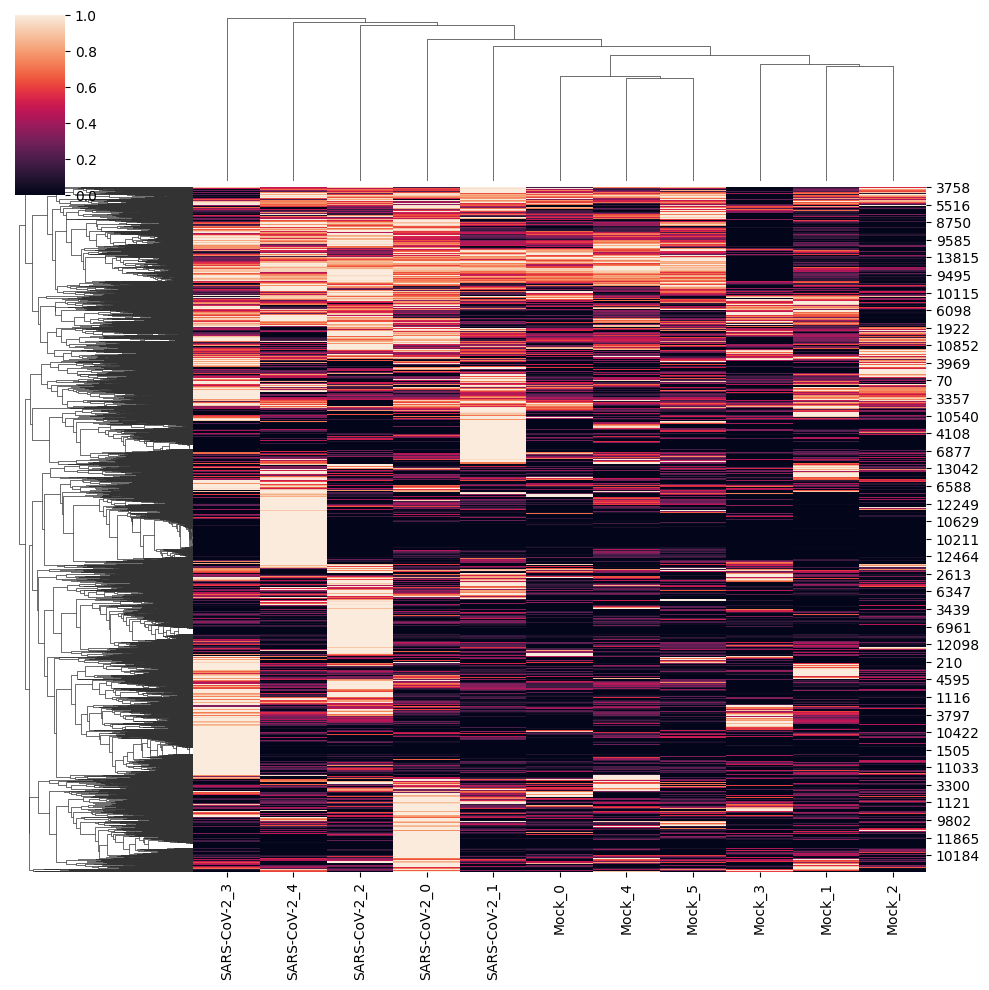

In [44]:
sb.clustermap(pd_feats.loc[sigMetsPD,list(samples[0]) + list(samples[1])].values,xticklabels=list(names[0]) + list(names[1]),standard_scale=0)

In [45]:
qcs = [x for x in pd_feats.columns.values if "QC" in x]
qcs

['QC-P pool-2_6540.mzML', 'QC-P pool-3_6540.mzML', 'QC-P pool-4_6540.mzML']

In [46]:
cvs = [np.std(row[qcs])/np.mean(row[qcs]) for index,row in pd_feats.iterrows() if np.mean(row[qcs]) > 0]

0.5778596298181166


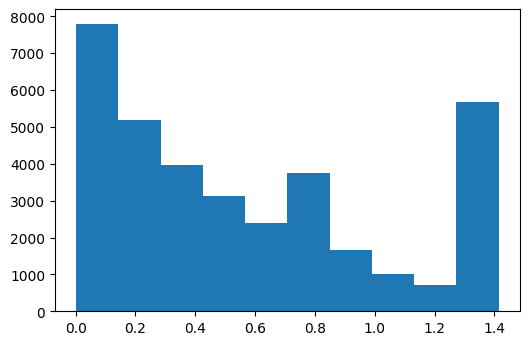

In [47]:
plt.hist(cvs)
print(np.mean(cvs))

In [48]:
cvs_xcms = [np.std(row[qcs])/np.mean(row[qcs]) for index,row in xcms_peaks_filt.iterrows() if np.mean(row[qcs]) > 0]

0.4995518604620137


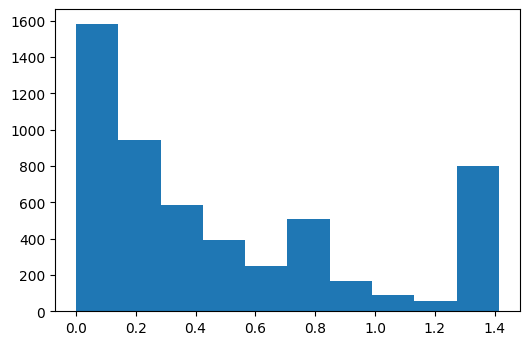

In [49]:
plt.hist(cvs_xcms)
print(np.mean(cvs_xcms))